# Correlation between BSS trips and COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and prepare covid data

In [2]:
data_folder = '../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/covid_grouped_by_month.csv')
covid_data

,date,new_cases_ma,new_deaths_ma
0,2020-03-01,150.576923,12.333333
1,2020-04-01,2174.333333,154.366667
2,2020-05-01,12159.870968,709.129032
3,2020-06-01,27629.260870,1006.033333
4,2020-07-01,38946.774194,1044.064516
5,2020-08-01,41451.129032,973.645161
6,2020-09-01,31207.833333,748.766667
7,2020-10-01,23612.064516,537.258065
8,2020-11-01,25812.133333,445.700000
9,2020-12-01,41881.096774,658.161290


In [3]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [4]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data

,new_cases_ma,new_deaths_ma
date,,
2020-03-01,150.576923,12.333333
2020-04-01,2174.333333,154.366667
2020-05-01,12159.870968,709.129032
2020-06-01,27629.260870,1006.033333
2020-07-01,38946.774194,1044.064516
2020-08-01,41451.129032,973.645161
2020-09-01,31207.833333,748.766667
2020-10-01,23612.064516,537.258065
2020-11-01,25812.133333,445.700000


## Prepare trips data

In [5]:
data_folder = '../data/'
trips = pd.read_csv(data_folder + 'trips/analysis/trips_grouped_by_month_mean.csv')
trips

,date,number_of_trips,tripduration,hour,age,week_day,weekend,holiday
0,2018-01-01,57.000000,3585.398001,15.247060,NaN,3.000000,0.333333,0.000000
1,2018-02-01,476.571429,2237.209127,13.638006,NaN,3.000000,0.285714,0.071429
2,2018-03-01,802.870968,2569.867173,13.008217,NaN,3.096774,0.290323,0.032258
3,2018-04-01,1079.533333,2024.101274,13.361577,NaN,3.000000,0.300000,0.066667
4,2018-05-01,2215.967742,1975.162249,13.470241,NaN,2.903226,0.258065,0.064516
5,2018-06-01,3083.600000,2101.515148,13.626468,NaN,3.100000,0.300000,0.000000
6,2018-07-01,3614.419355,2293.300753,13.576444,NaN,2.935484,0.290323,0.032258
7,2018-08-01,4430.935484,2766.196377,13.593908,NaN,3.000000,0.258065,0.000000
8,2018-09-01,5383.333333,2135.990251,13.643139,NaN,3.166667,0.333333,0.033333
9,2018-10-01,5327.806452,1631.979458,14.087414,NaN,2.806452,0.258065,0.032258


In [6]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [7]:
trips = dp.transform_to_datetime(trips, ['date'])

In [8]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [9]:
trips

,number_of_trips,tripduration,hour,age,week_day,weekend,holiday
date,,,,,,,
2018-01-01,57.000000,3585.398001,15.247060,NaN,3.000000,0.333333,0.000000
2018-02-01,476.571429,2237.209127,13.638006,NaN,3.000000,0.285714,0.071429
2018-03-01,802.870968,2569.867173,13.008217,NaN,3.096774,0.290323,0.032258
2018-04-01,1079.533333,2024.101274,13.361577,NaN,3.000000,0.300000,0.066667
2018-05-01,2215.967742,1975.162249,13.470241,NaN,2.903226,0.258065,0.064516
2018-06-01,3083.600000,2101.515148,13.626468,NaN,3.100000,0.300000,0.000000
2018-07-01,3614.419355,2293.300753,13.576444,NaN,2.935484,0.290323,0.032258
2018-08-01,4430.935484,2766.196377,13.593908,NaN,3.000000,0.258065,0.000000
2018-09-01,5383.333333,2135.990251,13.643139,NaN,3.166667,0.333333,0.033333


## Merge COVID and trip data

In [10]:
trips_and_covid = pd.merge(trips, covid_data, left_index=True, right_index=True)
trips_and_covid

,number_of_trips,tripduration,hour,age,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,
2020-03-01,8211.451613,1703.564246,14.496716,29.130817,2.935484,0.290323,0.000000,150.576923,12.333333
2020-04-01,5700.433333,1857.467596,15.041097,28.104305,2.966667,0.266667,0.100000,2174.333333,154.366667
2020-05-01,5352.193548,1817.646573,14.992516,28.616641,3.193548,0.322581,0.032258,12159.870968,709.129032
2020-06-01,4978.800000,1842.382151,15.002379,28.865224,2.833333,0.266667,0.033333,27629.260870,1006.033333
2020-07-01,5554.516129,1803.096096,14.831451,29.402450,3.000000,0.258065,0.032258,38946.774194,1044.064516
2020-08-01,5986.967742,1828.110106,14.794973,29.425583,3.064516,0.322581,0.000000,41451.129032,973.645161
2020-09-01,7043.900000,1866.475558,14.581225,29.319024,2.900000,0.266667,0.033333,31207.833333,748.766667
2020-10-01,6697.483871,2009.330596,14.666196,29.224291,3.096774,0.290323,0.032258,23612.064516,537.258065
2020-11-01,5350.866667,2333.952735,14.352335,30.178350,3.000000,0.300000,0.066667,25812.133333,445.700000


In [11]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-03-01 00:00:00')

## Correlation

In [12]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    plt.title("Correlation with '{variable}' variable".format(variable = target_variable))
    plt.show(True)

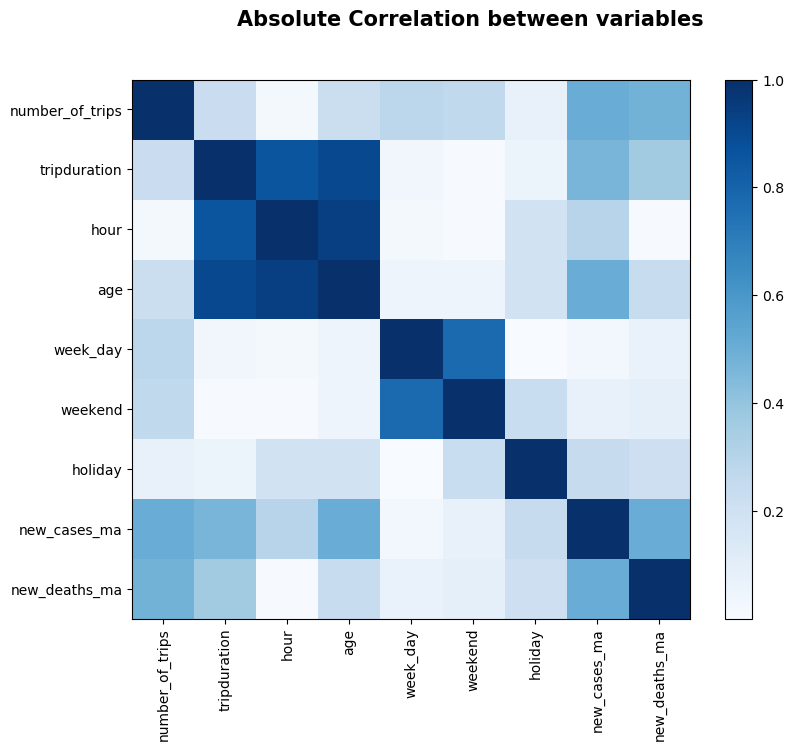

In [13]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

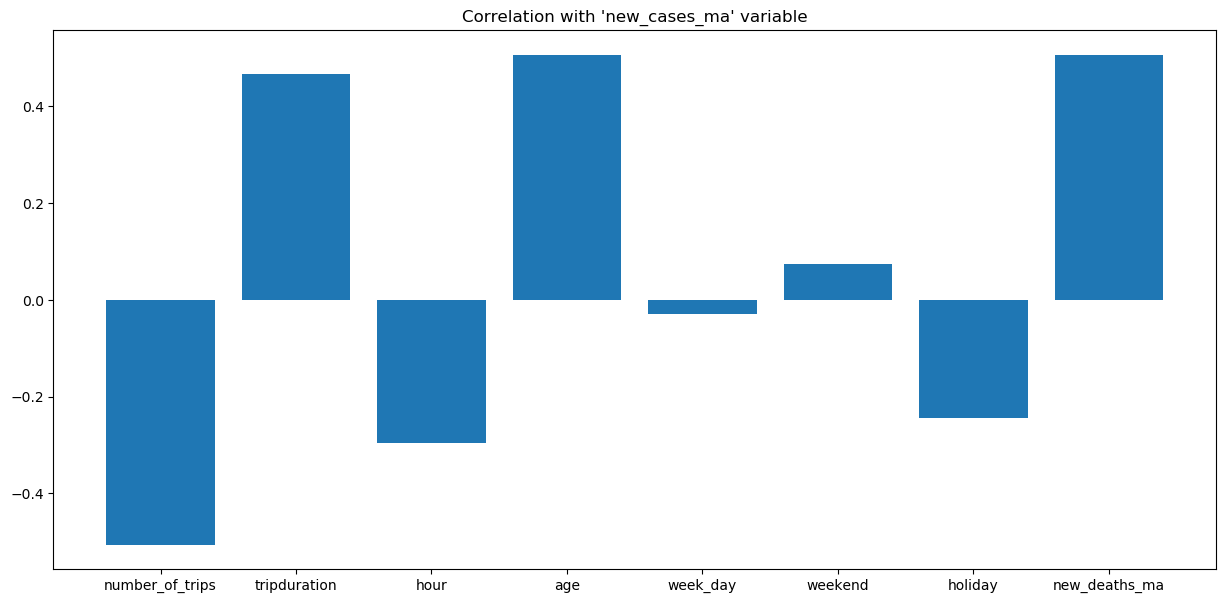

In [14]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid,
                                                             correlation_matrix, 'new_cases_ma')
correlation_with_variable

## COVID-19 deaths

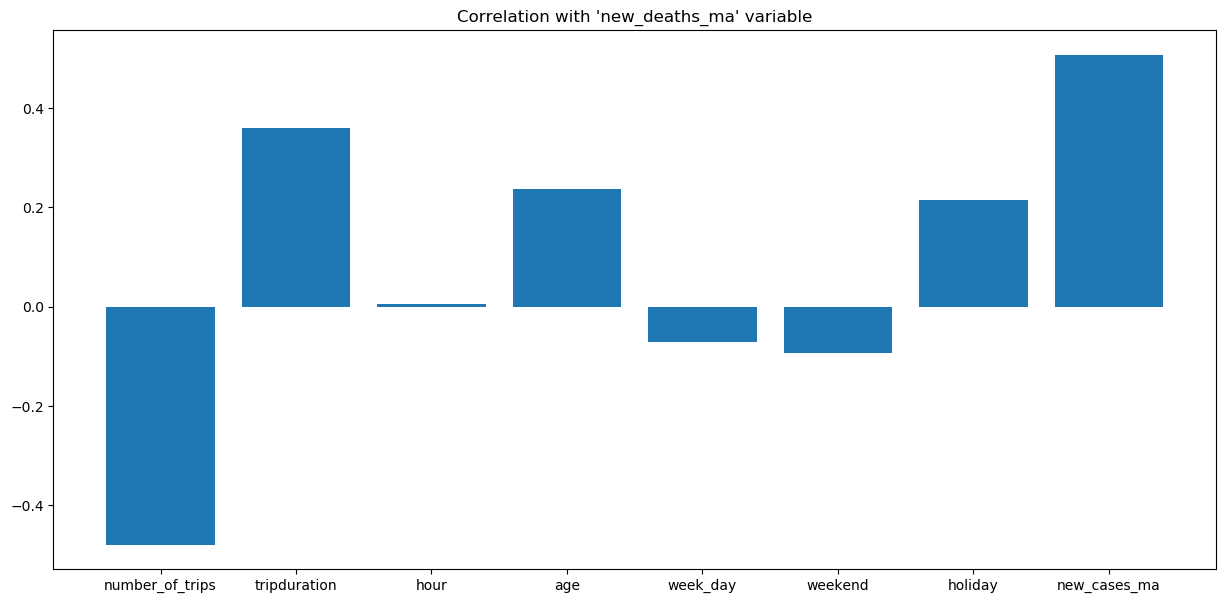

In [15]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid,
                                                                correlation_matrix, 'new_deaths_ma')
correlation_with_variable

### Plot together

In [16]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    trips_and_covid_plot.plot(secondary_y = covid_variable)

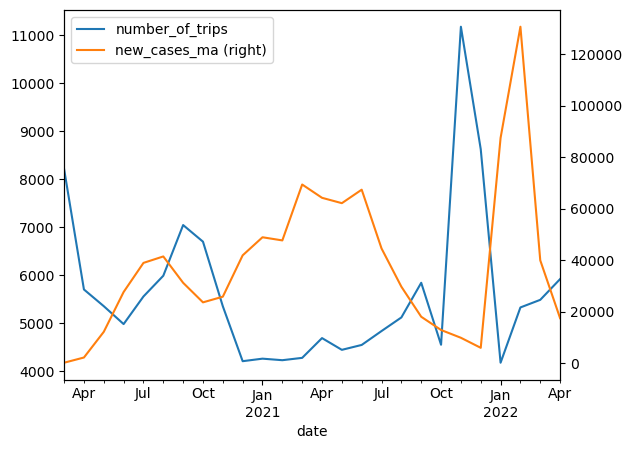

In [17]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

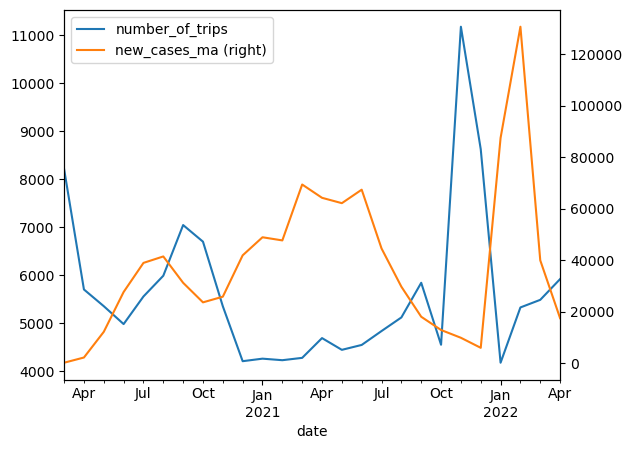

In [18]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
trips_and_covid_range = trips_and_covid['2020':]
trips_and_covid_plot = trips_and_covid_range.filter([variable, covid_variable])
trips_and_covid_plot.plot(secondary_y = covid_variable)

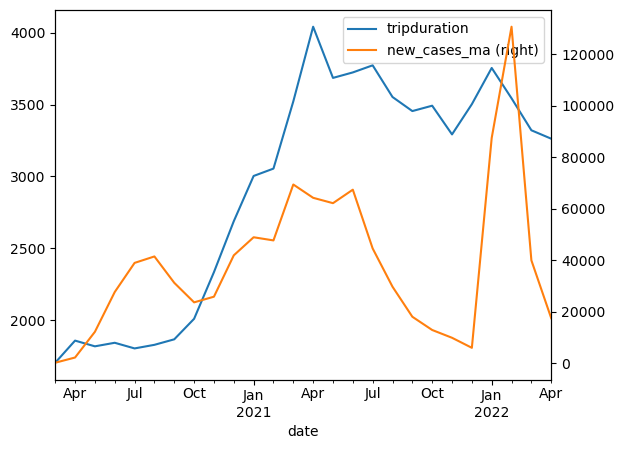

In [19]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

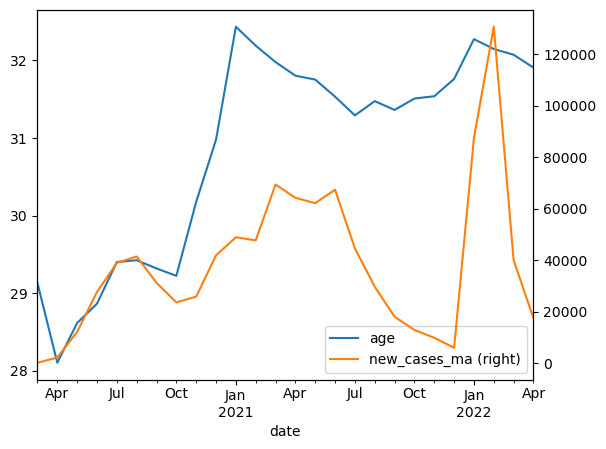

In [20]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)